<center>
    <h1>Instituto Politécnico Nacional</h1>
    <h2>Escuela Superior de Cómputo</h2>
</center>

<br> 
<br>

Asignatura: ***Inteligencia Artificial***<br>

Alumno: ***Suárez Bautista José Manuel***<br>

Boleta: ***2019640115***<br>

Grupo: ***6CM1***<br>

---
<center>
    <h3>Práctica 4</h3>
    <h4>Hierarchical Clustering</h4>
    <p>25 de noviembre de 2022</p>
</center>

In [203]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from math import sqrt

In [255]:
muestras = np.random.rand(9,2)
centroides = muestras # inicializamos los centroides con los valores de cada muestra
clusters = [[i] for i in range(9)] # guardar los puntos que pertenecen a cada cluster

matrizDistanciaINF = np.full((9, 9), fill_value=10000, dtype = np.double) # inicializamos la matriz de distancias

for i in range(9): # calculo inicial de las distancias entre clusters
    for j in range(i):
        matrizDistanciaINF[i][j] = dist_eucl(muestras[i][0], muestras[i][1], muestras[j][0], muestras[j][1])
        
def dist_eucl(x1,y1,x2,y2): 
    "regresa la distancia euclidiana entre dos puntos"
    return sqrt((x1-x2)**2 + (y1-y2)**2)

def centroide(puntos):
    "regresa el centroide de un conjunto de puntos"
    xs = np.fromiter(map(lambda p: muestras[p][0], puntos), dtype=np.double)
    ys = np.fromiter(map(lambda p: muestras[p][1], puntos), dtype=np.double)
    return [np.mean(xs), np.mean(ys)]

def nuevoCluster(c1, c2):
    clusters.append(clusters[c1]+clusters[c2])
    print(f'Nuevo cluster: {clusters[-1]}')
    del clusters[c1]
    del clusters[c2]
    print('Clusters actuales: ')
    print(clusters)

def distanciaCentroides(nC):
    return [dist_eucl(nC[0], nC[1], p[0], p[1]) for p in centroides]

color = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'gold']

def plotScatter(clusters):
    """función para graficar por clusters"""
    i = 0
    for c in clusters:
        plt.scatter(muestras[[c],0], muestras[[c],1], c=color[i], label=str(i))
        i+=1
        

### Hierarchical clustering (by centroids)

[[0.3016451  0.56416156]
 [0.92635615 0.68359463]
 [0.73487778 0.58199995]
 [0.05237895 0.79785359]
 [0.98303574 0.13032817]
 [0.70415481 0.98964704]
 [0.42945554 0.20002336]
 [0.18037233 0.37623284]
 [0.16733958 0.13810253]]


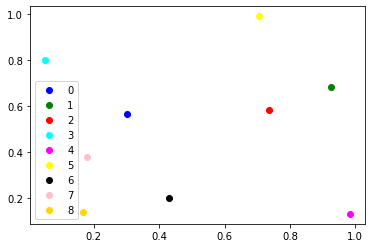

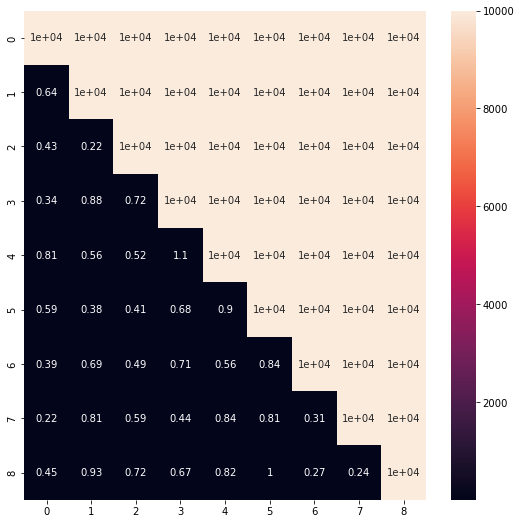

Distancia minima: 0.21676126305112833: [2],[1]
Nuevo cluster: [2, 1]
Clusters actuales: 
[[0], [3], [4], [5], [6], [7], [8], [2, 1]]
Nuevo centroide: [0.8306169684139605, 0.6327972908619308]
Nueva fila: [[0.53340613 0.79554886 0.5250778  0.37859532 0.59010488 0.69903033
  0.82744172]]


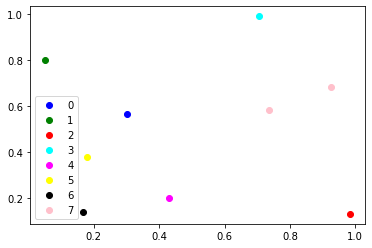

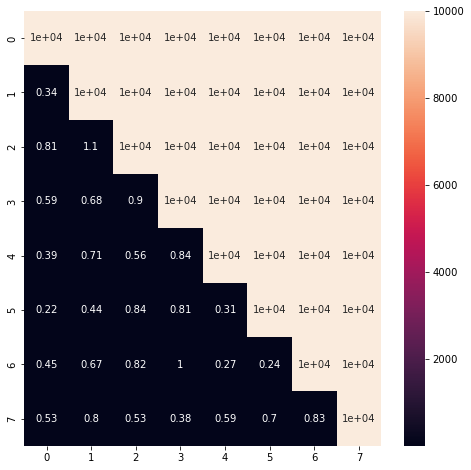


Distancia minima: 0.2236611049284982: [5],[0]
Nuevo cluster: [7, 0]
Clusters actuales: 
[[3], [4], [5], [6], [8], [2, 1], [7, 0]]
Nuevo centroide: [0.24100871295574922, 0.4701972025820101]
Nueva fila: [[0.37807393 0.81615872 0.69593996 0.32940266 0.34016762 0.61161809]]


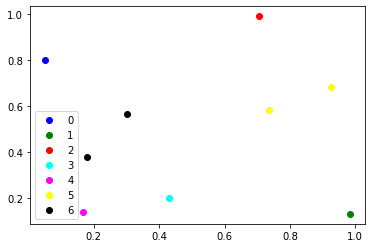

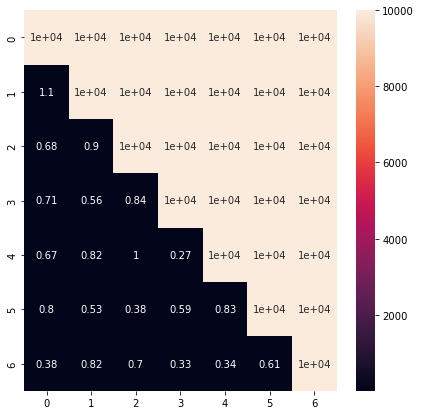


Distancia minima: 0.26933058401183596: [4],[3]
Nuevo cluster: [8, 6]
Clusters actuales: 
[[3], [4], [5], [2, 1], [7, 0], [8, 6]]
Nuevo centroide: [0.298397561395029, 0.1690629451930325]
Nueva fila: [[0.67520577 0.68573305 0.91542187 0.70590866 0.30655394]]


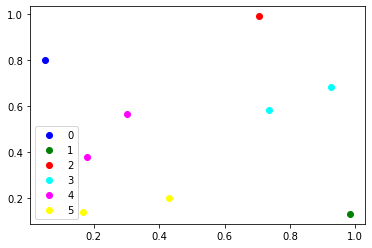

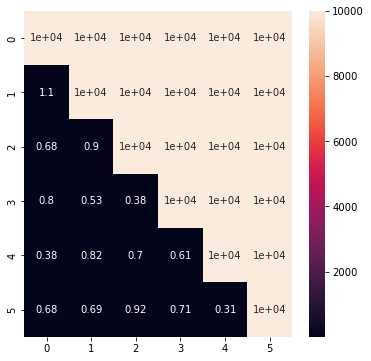


Distancia minima: 0.30655394451612855: [5],[4]
Nuevo cluster: [8, 6, 7, 0]
Clusters actuales: 
[[3], [4], [5], [2, 1], [8, 6, 7, 0]]
Nuevo centroide: [0.2697031371753891, 0.3196300738875213]
Nueva fila: [[0.52528805 0.73802345 0.79854304 0.64241578]]


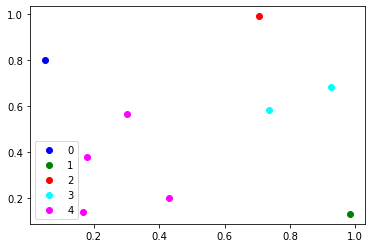

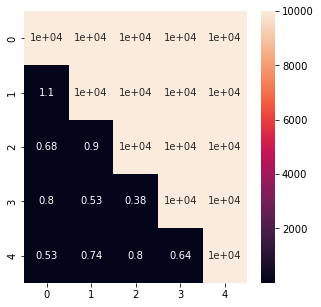


Distancia minima: 0.3785953238529018: [3],[2]
Nuevo cluster: [2, 1, 5]
Clusters actuales: 
[[3], [4], [8, 6, 7, 0], [2, 1, 5]]
Nuevo centroide: [0.7884629145091254, 0.7517472060446467]
Nueva fila: [[0.73752654 0.65116833 0.67515696]]


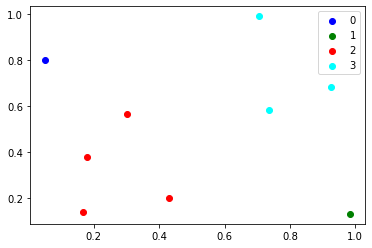

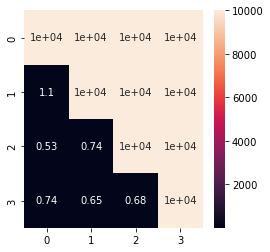


Distancia minima: 0.5252880470017275: [2],[0]
Nuevo cluster: [8, 6, 7, 0, 3]
Clusters actuales: 
[[4], [2, 1, 5], [8, 6, 7, 0, 3]]
Nuevo centroide: [0.22623829975822715, 0.41527477683136044]
Nueva fila: [[0.80866367 0.65521768]]


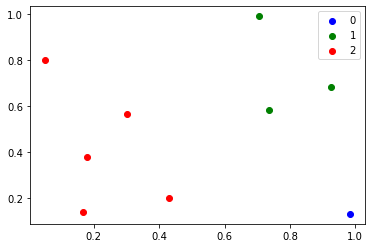

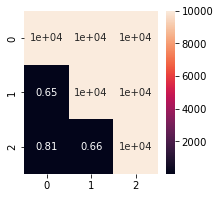


Distancia minima: 0.6511683324190356: [1],[0]
Nuevo cluster: [2, 1, 5, 4]
Clusters actuales: 
[[8, 6, 7, 0, 3], [2, 1, 5, 4]]
Nuevo centroide: [0.8371061204683772, 0.5963924480370706]
Nueva fila: [[0.63715234]]


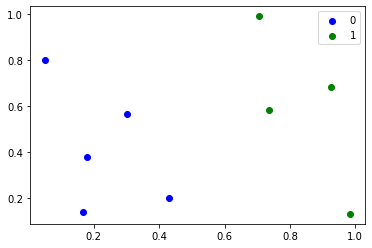

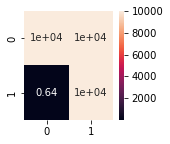


Distancia minima: 0.6371523406550019: [1],[0]
Nuevo cluster: [2, 1, 5, 4, 8, 6, 7, 0, 3]
Clusters actuales: 
[[2, 1, 5, 4, 8, 6, 7, 0, 3]]
Nuevo centroide: [0.49773510896273826, 0.4957715195894539]


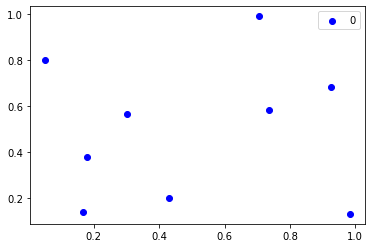

In [256]:
print(muestras)

plotScatter(clusters)
plt.legend()
plt.show()

plt.figure(figsize=(9, 9))
sn.heatmap(matrizDistanciaINF, annot=True)
plt.show()

while 1:
    min_ = np.amin(matrizDistanciaINF) # distancia más cercana entre clusters
    f, c = np.where(matrizDistanciaINF==np.amin(matrizDistanciaINF)) # clusters a unir 
    print(f'Distancia minima: {min_}: {f},{c}')
    
    centroides = np.delete(centroides, f, 0)
    centroides = np.delete(centroides, c, 0)

    nuevoCluster(int(f), int(c)) # concatena los puntos para generar nuevo cluster y eliminar los dos que se unieron
    
    nC = centroide(clusters[-1]) # generamos un nuevo centroide a partir de la unión
    print(f'Nuevo centroide: {nC}')
    
    if(matrizDistanciaINF.shape != (2,2)):
        if f > c:
            mayor = f
            menor = c
        else:
            mayor = c
            menor = f
    
        matrizDistanciaINF = np.delete(matrizDistanciaINF, mayor, axis=0)
        matrizDistanciaINF = np.delete(matrizDistanciaINF, menor, axis=0)
        matrizDistanciaINF = np.delete(matrizDistanciaINF, mayor, axis=1)
        matrizDistanciaINF = np.delete(matrizDistanciaINF, menor, axis=1)
    else:
        break
         
    nuevoC = np.array([distanciaCentroides(nC)])
    print(f'Nueva fila: {nuevoC}')
    matrizDistanciaINF = np.append(matrizDistanciaINF,nuevoC, axis=0)
    
    nuevaZero = np.full((matrizDistanciaINF.shape[0],1), fill_value=10000, dtype = np.double)
    matrizDistanciaINF = np.append(matrizDistanciaINF,nuevaZero, axis=1)
    
    centroides = np.append(centroides, np.array([nC]), axis = 0)
    
    plotScatter(clusters)
    plt.legend()
    plt.show()
    plt.figure(figsize= matrizDistanciaINF.shape)
    sn.heatmap(matrizDistanciaINF, annot=True)
    plt.show()
    print()

plotScatter(clusters)
plt.legend()
plt.show()